<a href="https://colab.research.google.com/github/HugoETB/Ciencia-de-Datos-UNAD/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Descripción general de los datos:
              Year  Selling_Price  Present_Price     Kms_Driven          year  \
count  2360.000000     301.000000     301.000000     301.000000  12468.000000   
mean   2016.068644       4.661296       7.628472   36947.205980   2013.555743   
std       3.435772       5.082812       8.644115   38886.883882      4.118485   
min    1988.000000       0.100000       0.320000     500.000000   1983.000000   
25%    2014.000000       0.900000       1.200000   15000.000000   2011.000000   
50%    2016.000000       3.600000       6.400000   32000.000000   2014.000000   
75%    2018.000000       6.000000       9.900000   48767.000000   2017.000000   
max    2022.000000      35.000000  

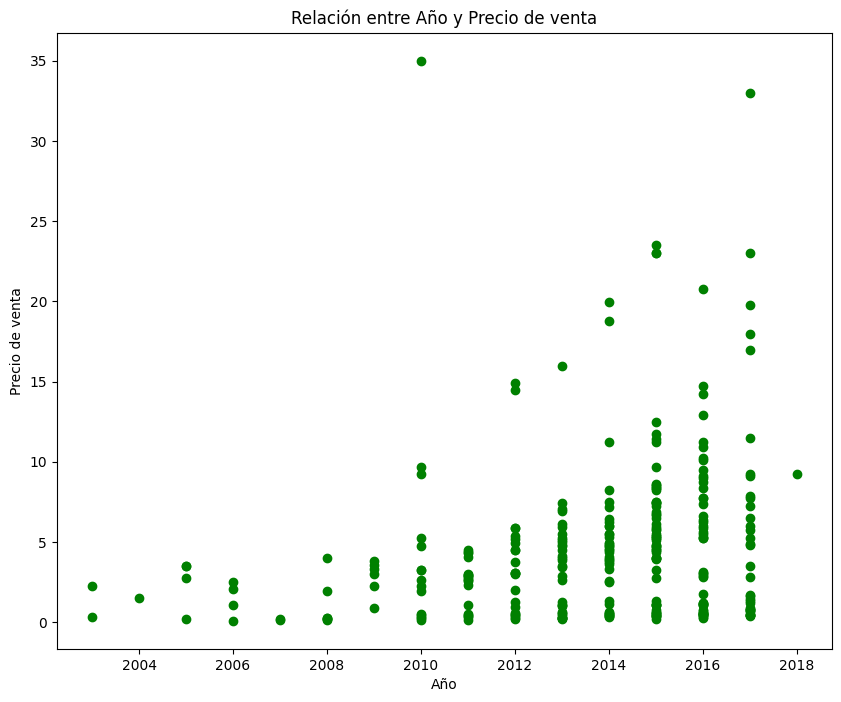

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['name' 'year' 'selling_price' 'km_driven' 'fuel' 'seller_type'
 'transmission' 'owner' 'mileage' 'engine' 'max_power' 'torque' 'seats'
 'Make' 'Model' 'Price' 'Kilometer' 'Fuel Type' 'Location' 'Color'
 'Seller Type' 'Engine' 'Max Power' 'Max Torque' 'Drivetrain' 'Length'
 'Width' 'Height' 'Seating Capacity' 'Fuel Tank Capacity']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



Regresión Lineal:
Mejores parámetros: {'fit_intercept': True, 'positive': False}
Mean Squared Error: 3.448447970963748
R-squared: 0.8502990897441183

Regresión Logística:
Mejores parámetros: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.9672131147540983
Precision: 1.0
Recall: 0.9375
F1-score: 0.967741935483871


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_


Árboles de Decisión:
Mejores parámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 1.4833812821891084
R-squared: 0.9356047908885267


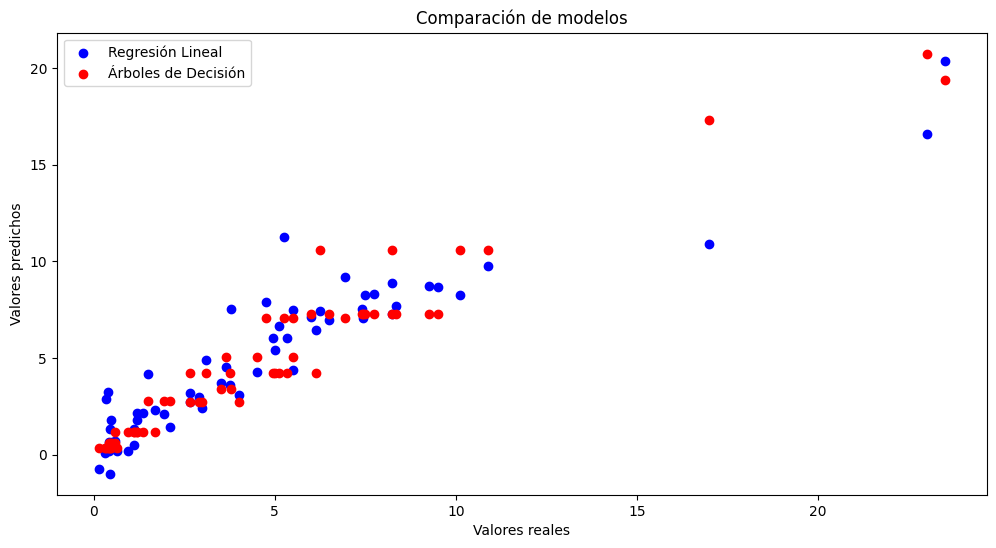

In [1]:
# Montar Google Drive y configurar el directorio
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/archivos/")

# Instalar las dependencias necesarias
!pip install --upgrade scikit-learn

# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Agregamos Seaborn para gráficos más elegantes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.impute import SimpleImputer

# Cargar los datasets
dataset1 = pd.read_csv('car data.csv')
dataset2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset3 = pd.read_csv('Car details v3.csv')
dataset4 = pd.read_csv('car details v4.csv')

# Concatenar los datasets
data = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)

# Análisis exploratorio de datos
print("Descripción general de los datos:")
print(data.describe())

print("\nInformación sobre los datos:")
print(data.info())

print("\nVerificación de valores faltantes:")
print(data.isnull().sum())

# Visualizaciones y análisis adicionales
plt.figure(figsize=(10, 8))
plt.scatter(data['Year'], data['Selling_Price'], color='green')  # Cambiamos el color
plt.xlabel('Año')
plt.ylabel('Precio de venta')
plt.title('Relación entre Año y Precio de venta')
plt.show()

# Preprocesamiento de datos
# Verificar la existencia de las columnas necesarias
required_features = ['Car_Name', 'Selling_Price', 'Fuel_Type', 'Transmission', 'Seller_Type']
missing_features = set(required_features) - set(data.columns)
if missing_features:
    raise ValueError(f"Faltan las siguientes columnas en los datasets: {missing_features}")

# Eliminar filas con valores faltantes en columnas específicas
data = data.dropna(subset=['Car_Name', 'Selling_Price', 'Fuel_Type', 'Transmission', 'Seller_Type'])

# Verificar que el DataFrame no esté vacío después de la eliminación de valores faltantes
if data.empty:
    raise ValueError("El DataFrame está vacío después de la eliminación de valores faltantes")

# Codificar variables categóricas
encoder = LabelEncoder()
data.loc[:, 'Fuel_Type'] = encoder.fit_transform(data['Fuel_Type'])
data.loc[:, 'Transmission'] = encoder.fit_transform(data['Transmission'])
data.loc[:, 'Seller_Type'] = encoder.fit_transform(data['Seller_Type'])

# Seleccionar las características relevantes
if 'Car_Name' not in data.columns or 'Selling_Price' not in data.columns:
    raise ValueError("Las columnas 'Car_Name' y 'Selling_Price' no existen en el DataFrame")

X = data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = data['Selling_Price']

# Convertir el problema en clasificación binaria
price_threshold = y.median()  # Puedes ajustar el umbral según tus criterios
y_binary = (y > price_threshold).astype(int)

# Imputar valores faltantes en X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Selección de características con SelectKBest
selector_kbest = SelectKBest(f_regression, k=5)
X_selected_kbest = selector_kbest.fit_transform(X_imputed, y)

# Selección de características con RFE
selector_rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
X_selected_rfe = selector_rfe.fit_transform(X_imputed, y)

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_selected_kbest, y, test_size=0.2, random_state=42)
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_selected_kbest, y_binary, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_binary_scaled = scaler.fit_transform(X_train_binary)
X_test_binary_scaled = scaler.transform(X_test_binary)

# Regresión Lineal
lin_reg = LinearRegression()
params_lin_reg = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search_lin_reg = GridSearchCV(lin_reg, params_lin_reg, cv=5)
grid_search_lin_reg.fit(X_train_scaled, y_train)
best_lin_reg = grid_search_lin_reg.best_estimator_
y_pred_lin_reg = best_lin_reg.predict(X_test_scaled)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print("\nRegresión Lineal:")
print("Mejores parámetros:", grid_search_lin_reg.best_params_)
print("Mean Squared Error:", mse_lin_reg)
print("R-squared:", r2_lin_reg)

# Regresión Logística
log_reg = LogisticRegression()
params_log_reg = {'penalty': ['l2', 'none'], 'C': [0.1, 1, 10]}
grid_search_log_reg = GridSearchCV(log_reg, params_log_reg, cv=5)
grid_search_log_reg.fit(X_train_binary_scaled, y_train_binary)
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_log_reg.predict(X_test_binary_scaled)
accuracy_log_reg = accuracy_score(y_test_binary, y_pred_log_reg)
precision_log_reg = precision_score(y_test_binary, y_pred_log_reg)
recall_log_reg = recall_score(y_test_binary, y_pred_log_reg)
f1_log_reg = f1_score(y_test_binary, y_pred_log_reg)
print("\nRegresión Logística:")
print("Mejores parámetros:", grid_search_log_reg.best_params_)
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1-score:", f1_log_reg)

# Árboles de Decisión
dt = DecisionTreeRegressor()
params_dt = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(dt, params_dt, cv=5)
grid_search_dt.fit(X_train_scaled, y_train)
best_dt = grid_search_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nÁrboles de Decisión:")
print("Mejores parámetros:", grid_search_dt.best_params_)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)

# Gráficas de resultados
plt.figure(figsize=(12, 6))  # Cambiamos el tamaño
plt.scatter(y_test, y_pred_lin_reg, label='Regresión Lineal', color='blue')  # Cambiamos el color
plt.scatter(y_test, y_pred_dt, label='Árboles de Decisión', color='red')  # Cambiamos el color
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.legend()
plt.title('Comparación de modelos')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')